In [4]:
# Stop warnings
# -------------
import warnings
warnings.filterwarnings("ignore")

# General imports
# ---------------
import os
import sys
import json
import glob
import numpy as np
import matplotlib.pyplot as pl
import ipdb
import platform
opj = os.path.join
deb = ipdb.set_trace
import cifti

# MRI imports
# -----------
import nibabel as nb
import cortex

# Functions import
# ----------------
from utils import set_pycortex_config_file, convert_fit_results, draw_cortex_vertex

#Get inputs
subject = '999999'
fit_model = 'gauss'
job_vox = 2500
draw_roi = 1

if fit_model == 'gauss': fit_val = 6
elif fit_model == 'css': fit_val = 7
base_file_name = 'tfMRI_RETBARS_Atlas_1.6mm_MSMAll_hp2000_clean_sg_psc'


# Define analysis parameters
# --------------------------
with open('/home/szinte/projects/retino_HCP/settings.json') as f:
    json_s = f.read()
    analysis_info = json.loads(json_s)

# Define cluster/server specific parameters
# -----------------------------------------
if 'aeneas' in platform.uname()[1]:
    base_dir = analysis_info['aeneas_base_folder']
    main_cmd = '/home/szinte/software/workbench/bin_rh_linux64/wb_command'
    # main_cmd = '/home/ada/software/workbench/bin_rh_linux64/wb_command'

elif 'local' in platform.uname()[1]:
    base_dir = analysis_info['local_base_folder'] 
    main_cmd = '/Applications/workbench/bin_macosx64/wb_command'

# Output directory:
deriv_dir = opj(base_dir,'pp_data',subject,fit_model,'deriv')



In [10]:
# Combine fit files
# -----------------
prf_filename = opj(base_dir,'pp_data',subject,fit_model,'fit',"{bfn}.dtseries.nii".format(bfn= base_file_name))
data_fit_file = cifti.read(prf_filename)

sign_idx, rsq_idx, ecc_idx, polar_real_idx, polar_imag_idx , size_idx, \
                non_lin_idx, amp_idx, baseline_idx, cov_idx, x_idx, y_idx = 0,1,2,3,4,5,6,7,8,9,10,11

In [17]:
data = data_fit_file[0]

In [31]:
np.max(data[5,:])

0.33698081895597209

In [42]:
# Combine hemispheres
deriv_mat=[]
for hemi in ['L','R']:
    deriv_file = nb.load(opj(base_dir,'raw_data','999999',"tfMRI_RETBARS_Atlas_1.6mm_MSMAll_hp2000_clean_sg_psc_{hemi}.func.gii".format(hemi = hemi)))
    deriv_mat.append(np.array([deriv_file.darrays[i].data for i in range(len(deriv_file.darrays))]))
deriv_mat = np.hstack(deriv_mat)
deriv_mat_new = deriv_mat

# Combine hemispheres
deriv_mat=[]
for hemi in ['L','R']:
    deriv_file = nb.load(opj(base_dir,'raw_data','999999_mm16',"tfMRI_RETBAR1_7T_AP_Atlas_MSMAll_hp2000_clean.dtseries_{hemi}.func_bla_psc_av.gii".format(hemi = hemi)))
    deriv_mat.append(np.array([deriv_file.darrays[i].data for i in range(len(deriv_file.darrays))]))
deriv_mat = np.hstack(deriv_mat)
deriv_mat_old = deriv_mat


(300, 118584)

In [41]:
deriv_mat_old.shape

(300, 118584)

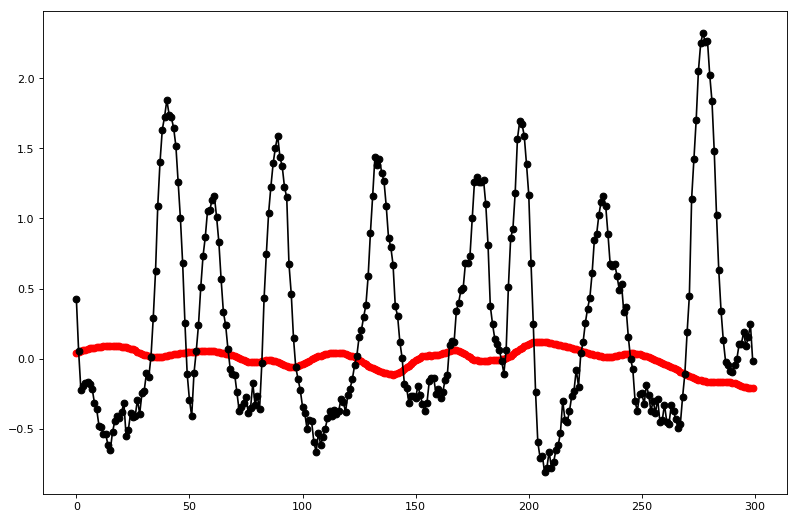

In [51]:
import matplotlib.pyplot as plt

vox = 4
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(deriv_mat_new[:,vox],'-ro',label='data new')
plt.plot(deriv_mat_old[:,vox],'-ko',label='data old')


plt.show()